#ACTIVITAT 1
Avaluació en un conjunt de dades de la borsa

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
#carregar dades del DRIVE
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data_ag = pd.read_csv('drive/My Drive/MIDA/company-stock-movements-2010-2015-incl.csv',sep=',')


print(data_ag.shape)
data_ag.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(60, 964)


,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [ ]:
#Crear set de dades
#No calen noms de les empreses
data_ag = data_ag.drop(['Unnamed: 0'], axis=1)

data_float = data_ag.astype(float).T

#inicalitzar
Xa = []
Ya = []

# Bucle per cada companyia
for company in data_float.columns:
    # Bucle per el dataframe amb la finestra de 6DIES
    for i in range(len(data_float) - 6):
        Xa.append(data_float[company].iloc[i:i+5].values)  # 5 DIES
        Ya.append(data_float[company].iloc[i+5])          # 6 DIES
Xa = np.array(Xa)
Ya = np.array(Ya)
print(Xa.shape)

(57420, 5)


In [ ]:
import numpy as np
frac = 0.4  # Change 0.1 to the fraction you desire

indices = np.random.choice(Xa.shape[0], size=int(Xa.shape[0] * frac), replace=False)
Xa = Xa[indices]
Ya = Ya[indices]

if not isinstance(Xa, pd.DataFrame):
    Xa = pd.DataFrame(Xa)

Xa = Xa.to_numpy()
#Ya= Ya.to_numpy()

print(Xa.shape)

(9187, 5)


In [ ]:
import numpy as np

# Comprovació de la forma
print("Forma de X:", Xa.shape)
print("Forma de Y:", Ya.shape)

# Comprovació del contingut
print("\nDades d'exemple de X (primers dos mostres):")
print(Xa[:2])
print("\nDades corresponents de Y (primers dos mostres):")
print(Ya[:2])

# Comprovació del tipus de dades
print("\nTipus de dades de X:", Xa.dtype)
print("Tipus de dades de Y:", Ya.dtype)

# Comprovació de consistència- primeres dades
print("\nVerificant la primera mostra:")
print("Dades de X (primera mostra):", Xa[0])
print("Dades de Y (corresponents a la primera mostra):", Ya[0])

# Resum estadístic
print("\nResum estadístic de X:")
print("Mitjana:", np.mean(Xa, axis=0))
print("Desviació estàndard:", np.std(Xa, axis=0))

print("\nResum estadístic de Y:")
print("Mitjana:", np.mean(Ya))
print("Desviació estàndard:", np.std(Ya))

Forma de X: (9187, 5)
Forma de Y: (9187,)

Dades d'exemple de X (primers dos mostres):
[[ 0.       -0.06     -0.16     -0.13     -0.03    ]
 [ 0.42     -0.09     -0.09     -0.620001  0.770001]]

Dades corresponents de Y (primers dos mostres):
[-0.15      0.139999]

Tipus de dades de X: float64
Tipus de dades de Y: float64

Verificant la primera mostra:
Dades de X (primera mostra): [ 0.   -0.06 -0.16 -0.13 -0.03]
Dades de Y (corresponents a la primera mostra): -0.1499999999999985

Resum estadístic de X:
Mitjana: [0.01623596 0.02500697 0.02213693 0.01616044 0.02106405]
Desviació estàndard: [1.52788096 1.39501523 1.73594744 1.60692941 1.4210804 ]

Resum estadístic de Y:
Mitjana: 0.02310895134429097
Desviació estàndard: 1.4558231086548676


##Algorismes Geràrquics

In [ ]:
from scipy.cluster.hierarchy import linkage

# Creació de les etiquetes a partir dels índexs del DataFrame
labels = [f'Punt {i}' for i in range(len(data_ag))]

import pandas as pd
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(data_ag, metric='euclidean')),
                        columns=labels,
                        index=labels)

print(row_dist)

             Punt 0      Punt 1      Punt 2      Punt 3      Punt 4  \
Punt 0     0.000000  188.072261  187.607865  187.174650  186.046209   
Punt 1   188.072261    0.000000  102.917563   25.816008   31.591745   
Punt 2   187.607865  102.917563    0.000000  100.166135  101.017822   
Punt 3   187.174650   25.816008  100.166135    0.000000   26.522082   
Punt 4   186.046209   31.591745  101.017822   26.522082    0.000000   
Punt 5   190.119323   22.189345  104.647940   18.293987   27.144409   
Punt 6   187.482154   27.106572  102.189929   21.440052   27.381986   
Punt 7   188.815237   23.194656  102.594123   18.419268   26.159338   
Punt 8   180.367810   37.199798   98.468152   33.902893   34.681658   
Punt 9   189.278870   30.053287  102.712535   24.997970   30.443695   
Punt 10  186.654424   26.800586  101.233635   22.213959   28.446586   
Punt 11  189.236880   23.393444  103.899629   19.029293   26.927744   
Punt 12  183.572926   31.508866   99.276298   26.977324   31.045959   
Punt 1

In [ ]:
# Condensar matriu
row_clusters = linkage(pdist(data_ag, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
              columns=['Etiqueta fila 1', 'Etiqueta fila 2', 'Distància', 'Núm. d’elements al clúster'],
             index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
             )

,Etiqueta fila 1,Etiqueta fila 2,Distància,Núm. d’elements al clúster
cluster 1,34.0,58.0,4.119502,2.0
cluster 2,50.0,60.0,5.522790,3.0
cluster 3,5.0,16.0,6.347298,2.0
cluster 4,14.0,61.0,6.726342,4.0
cluster 5,15.0,62.0,6.805440,3.0
cluster 6,21.0,45.0,7.348482,2.0
cluster 7,11.0,63.0,7.419272,5.0
cluster 8,64.0,66.0,7.664897,8.0
cluster 9,39.0,52.0,7.677807,2.0
cluster 10,47.0,67.0,7.976352,9.0


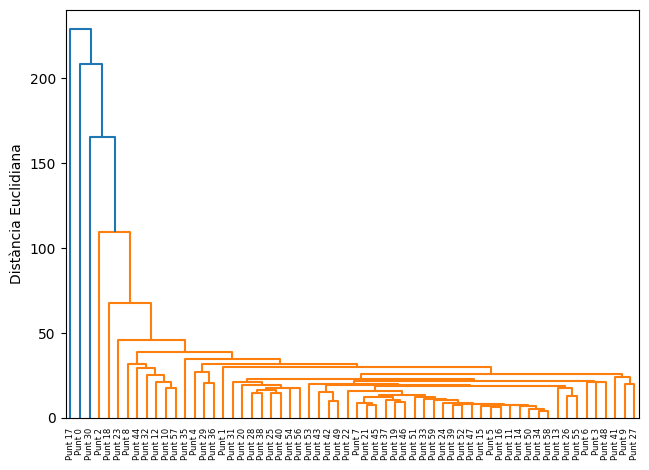

In [ ]:
from scipy.cluster.hierarchy import dendrogram
# Creació del DataFrame per als clústers
df_clusters = pd.DataFrame(row_clusters,
                           columns=['Etiqueta fila 1', 'Etiqueta fila 2', 'Distància', 'Núm. d’elements al clúster'],
                           index=['clúster %d' % (i + 1) for i in range(row_clusters.shape[0])])

# Creació i visualització del dendrograma
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Distància Euclidiana')
plt.show()

###Clusters aglomeratius

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


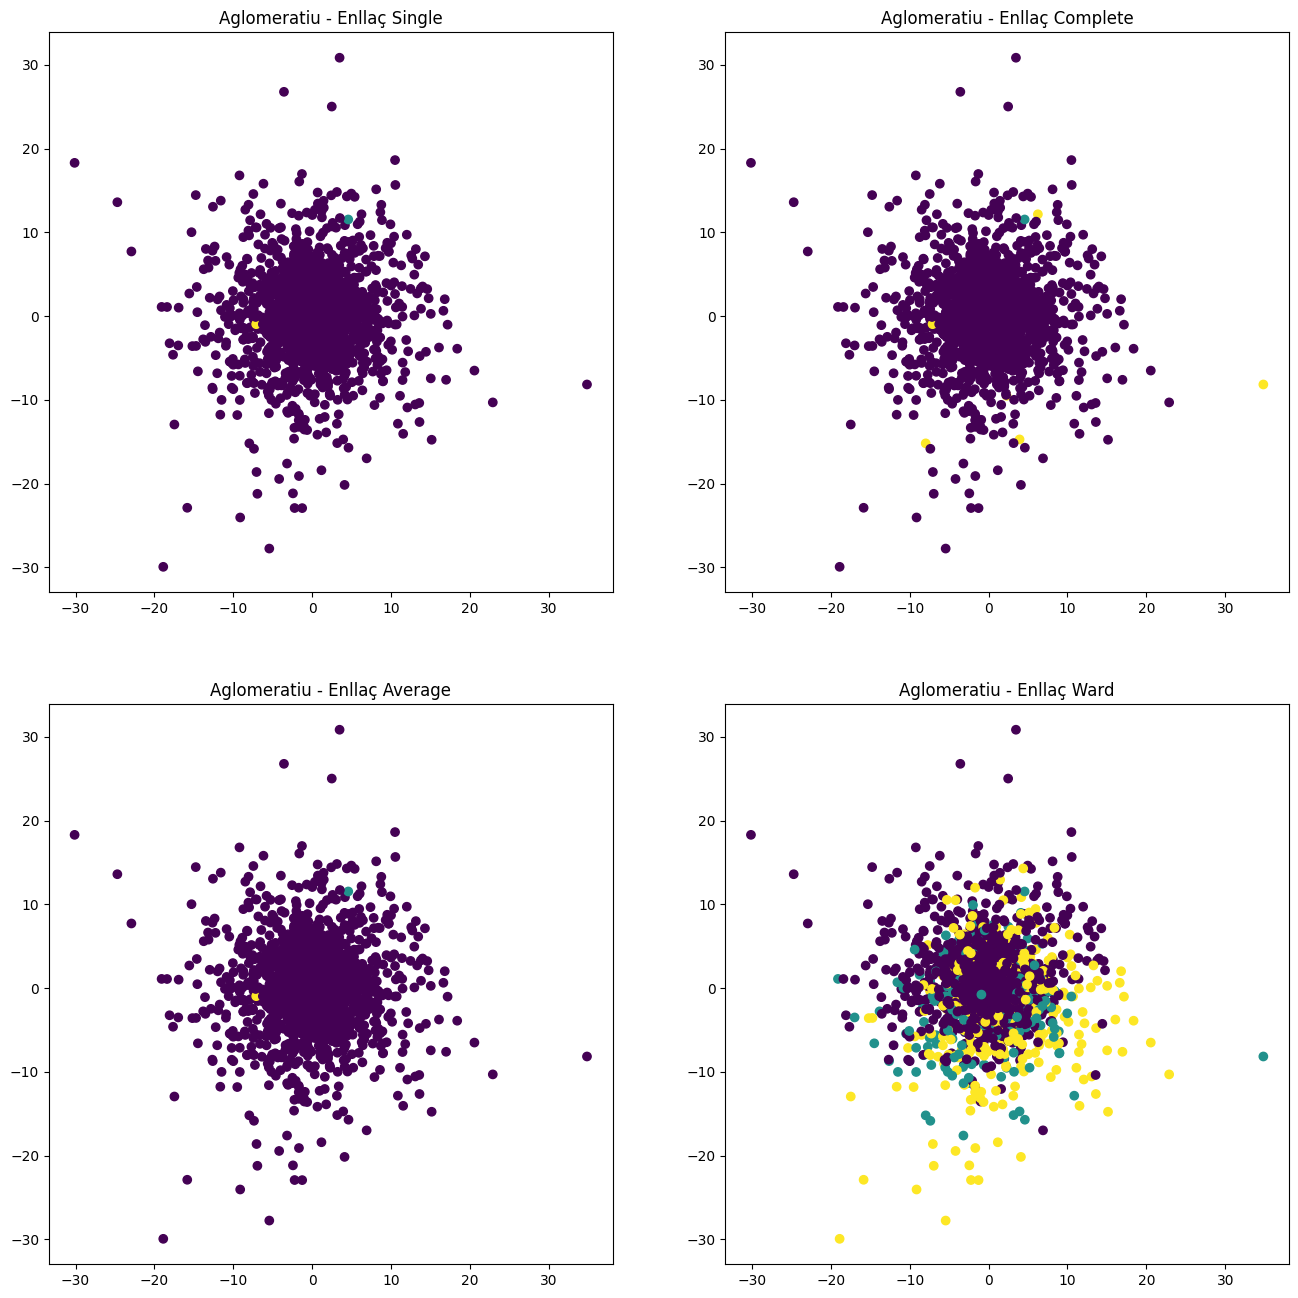

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Convertir el DataFrame a la matriu de característiques 'X' i el vector d'etiquetes 'Y'
#X =Xa
#Y = Ya

# Paràmetres inicials
random_state = 170
n_samples = 1500
plt.figure(figsize=(16, 16))

# Utilitzar K-means per trobar els centres dels clústers amb k elevada
kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(Xa)
centers = kmeans.cluster_centers_


# Tipus d'enllaç per a l'agrupació aglomerativa
linkage_types = ['single','complete', 'average', 'ward']

n_rows, n_cols = 2, 2  # Defineix 2 files i 2 columnes

for i, linkage in enumerate(linkage_types, start=1):
    # Aplicar agrupació aglomerativa

    agg_cluster = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    y_pred = agg_cluster.fit_predict(Xa)

    # Visualitzar els resultats
    plt.subplot(n_rows, n_cols, i)

    plt.scatter(Xa[:, 0], Xa[:, 1], c=y_pred)
    plt.title(f"Aglomeratiu - Enllaç {linkage.capitalize()}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


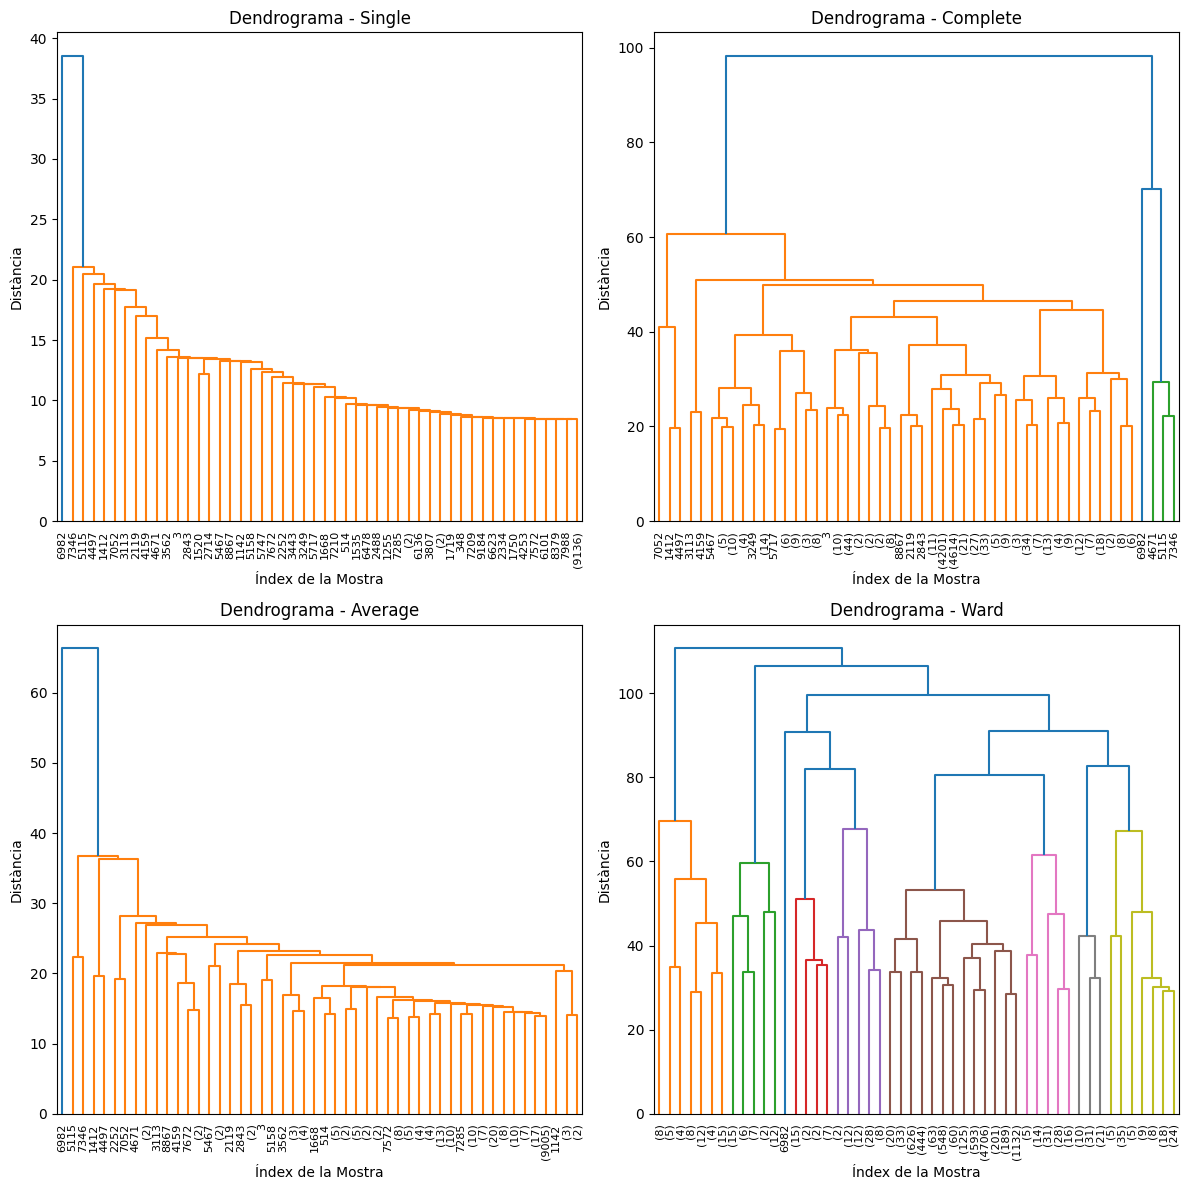

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Paràmetres inicials
random_state = 170
n_samples = 1500

# Utilitzar K-means per trobar els centres dels clústers amb k elevada
kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(Xa)

# Tipus d'enllaç per a l'agrupació aglomerativa
linkage_types = ['single','complete', 'average', 'ward']

# Crear una nova figura per als dendrogramas
plt.figure(figsize=(12, 12))

for i, linkage_type in enumerate(linkage_types, start=1):
    # Calcular el linkage per a cada tipus
    linked = linkage(Xa, method=linkage_type)

    # Visualitzar els resultats en un dendrograma
    plt.subplot(2, 2, i)
    dendrogram(linked, truncate_mode='lastp', p=50)  # Mostra només les últimes 50 fusió
    plt.title(f"Dendrograma - {linkage_type.capitalize()}")
    plt.xlabel('Índex de la Mostra')
    plt.ylabel('Distància')

plt.tight_layout()
plt.show()


###Clusters aglomeratius sobre els centres

In [ ]:
#carregar dades del DRIVE
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data_ac = pd.read_csv('drive/My Drive/MIDA/company-stock-movements-2010-2015-incl.csv',sep=',')

print(data_ac.shape)
data_ac.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(60, 964)


,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [ ]:
#Crear set de dades
#No calen noms de les empreses
data_ac = data_ac.drop(['Unnamed: 0'], axis=1)

data_float = data_ac.astype(float).T

#inicalitzar
X_ac= []
Y_ac = []

# Bucle per cada companyia
for company in data_float.columns:
    # Bucle per el dataframe amb la finestra de 6DIES
    for i in range(len(data_float) - 6):
        X_ac.append(data_float[company].iloc[i:i+5].values)  # 5 DIES
        Y_ac.append(data_float[company].iloc[i+5])          # 6 DIES

X_ac = np.array(X_ac)
Y_ac = np.array(Y_ac)

print(X_ac.shape)

(57420, 5)


In [ ]:
import numpy as np
frac = 0.4  # Change 0.1 to the fraction you desire

indices = np.random.choice(X_ac.shape[0], size=int(X_ac.shape[0] * frac), replace=False)
X_ac = X_ac[indices]
Y_ac = Y_ac[indices]

if not isinstance(Xa, pd.DataFrame):
    Xa = pd.DataFrame(Xa)

#X_ac = X_ac.to_numpy()
#Ya= Ya.to_numpy()

print(X_ac.shape)

(22968, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


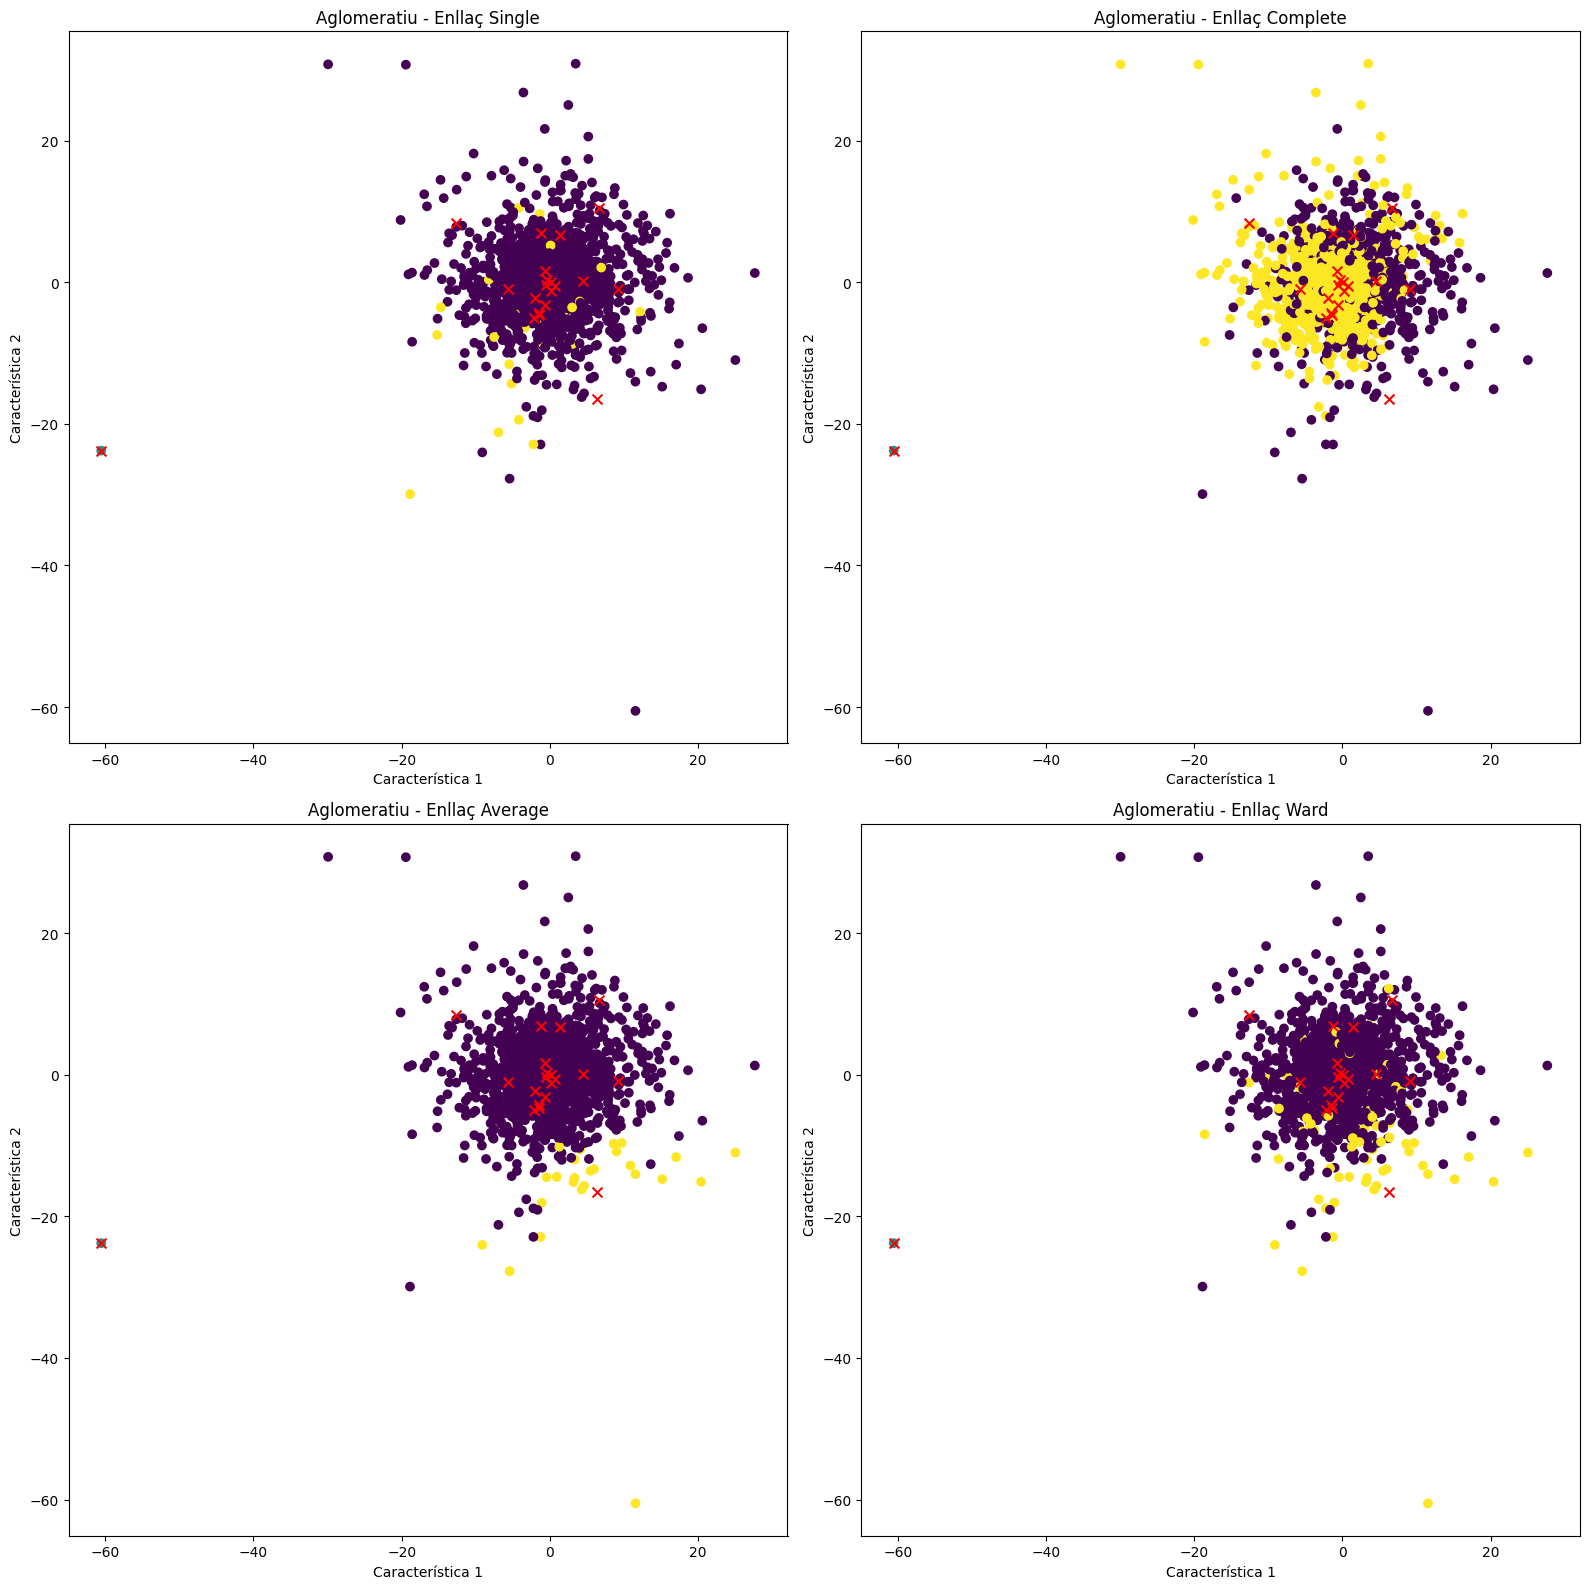

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pandas as pd

# Convertir el DataFrame a la matriu de característiques 'X' i el vector d'etiquetes 'Y'
#X =X_ac
#Y = Y_ac

# Paràmetres inicials
random_state = 170
n_clusters = 20  # nombre elevat de clústers per K-means

# Utilitzar K-means per trobar els centres dels clústers amb k elevada
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X_ac)
centers = kmeans.cluster_centers_

# Tipus d'enllaç per a l'agrupació aglomerativa
linkage_types = ['single','complete', 'average', 'ward']

# Configuració de la figura
plt.figure(figsize=(16, 16))
n_rows, n_cols = 2, 2  # Definim una graella de 2x2 per als gràfics

for i, linkage in enumerate(linkage_types, start=1):
    # Aplicar agrupació aglomerativa als centres de K-means
    agg_cluster = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    agg_cluster.fit(centers)

    # Assignar les etiquetes de clúster aglomeratiu a cada punt del conjunt de dades
    labels = agg_cluster.labels_
    y_pred = np.choose(kmeans.labels_, labels)

    # Visualitzar els resultats
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(X_ac[:, 0], X_ac[:, 1], c=y_pred, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, marker='x')  # Centres com a punts vermells
    plt.title(f"Aglomeratiu - Enllaç {linkage.capitalize()}")
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


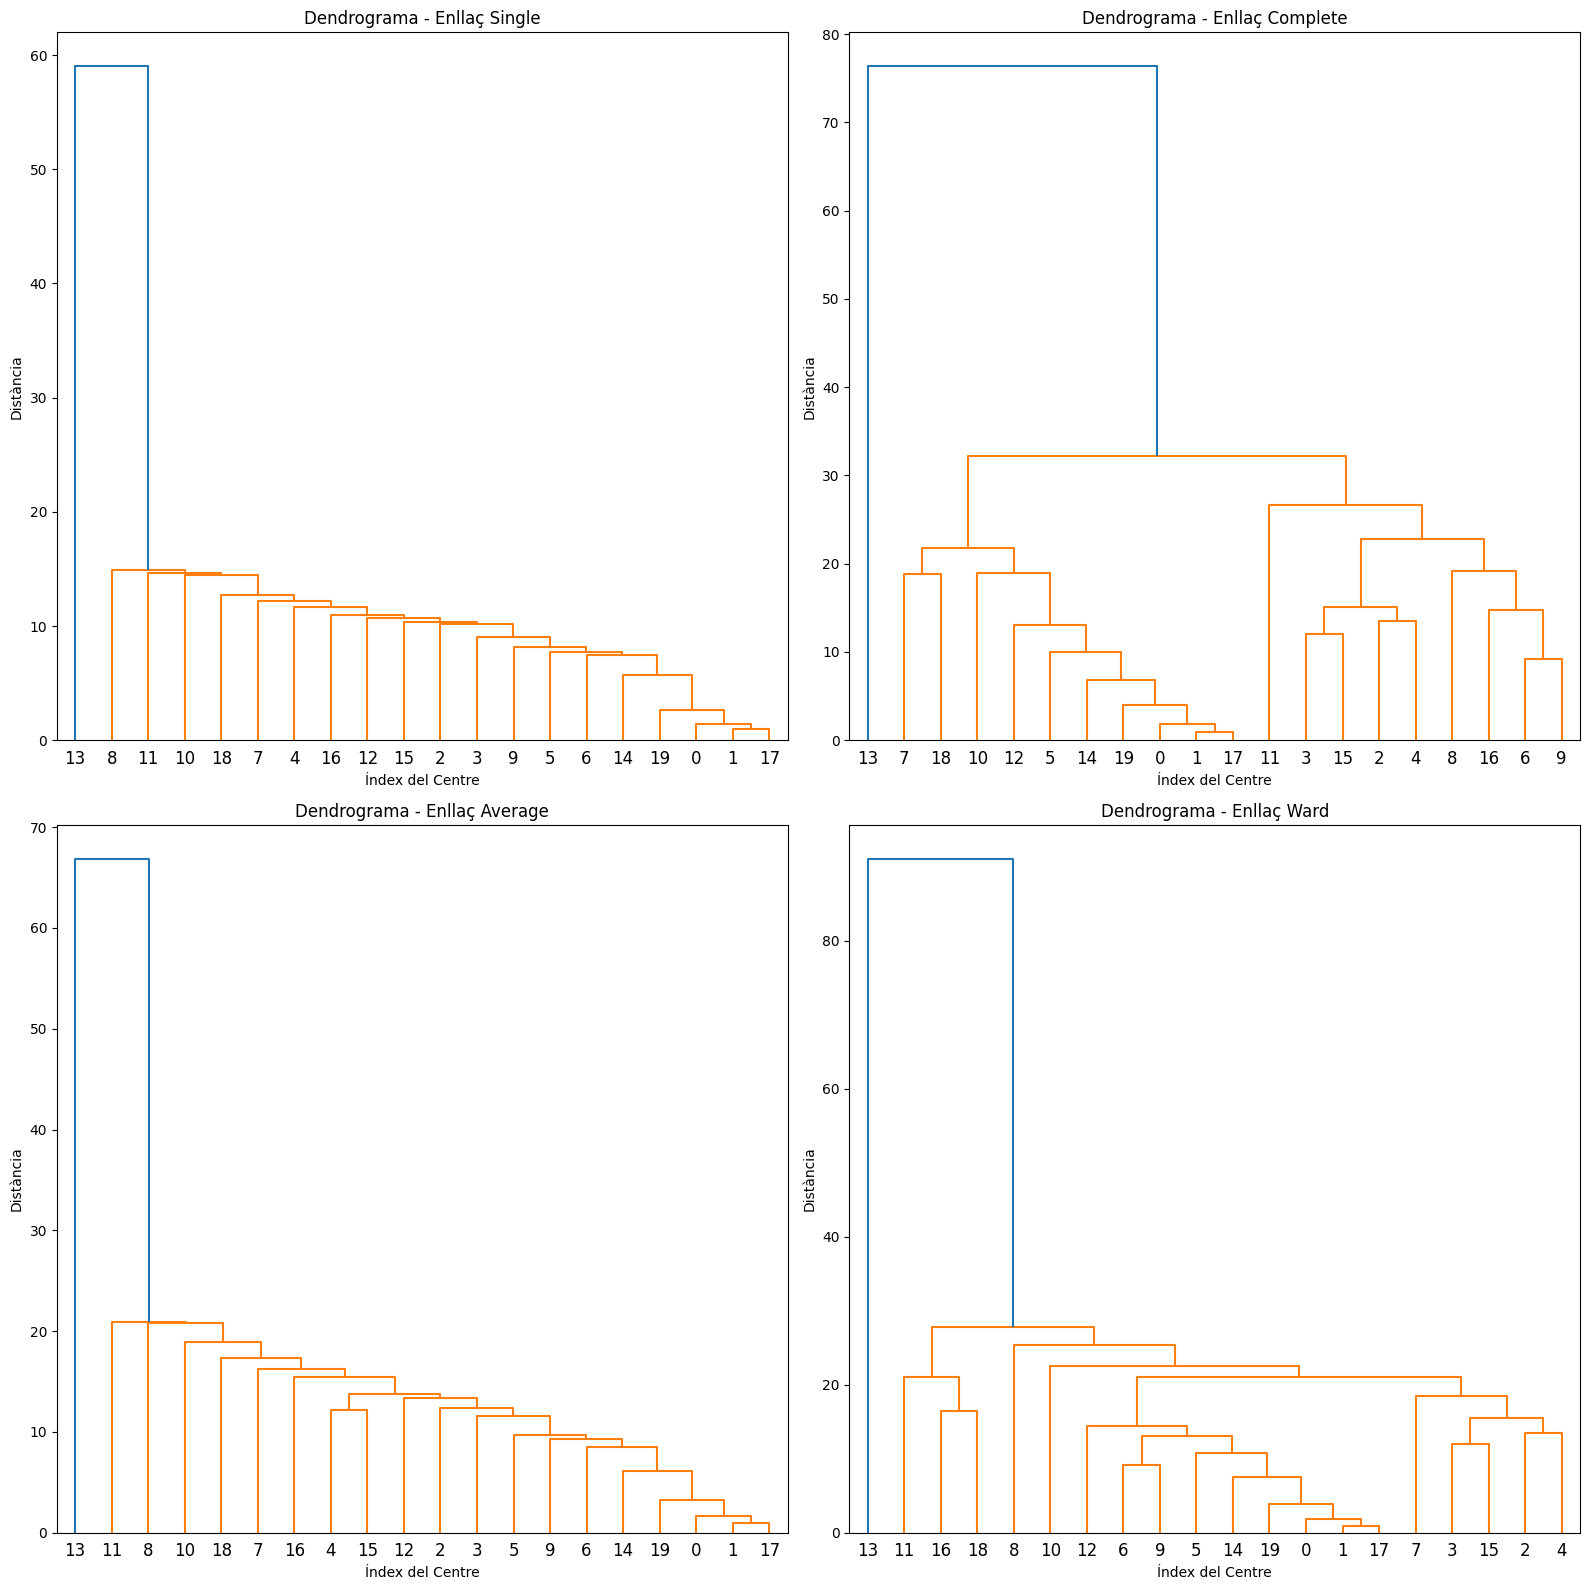

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Convertir el DataFrame a la matriu de característiques 'X' i el vector d'etiquetes 'Y'
#X =X_ac
#Y = Y_ac

# Paràmetres inicials
random_state = 170
n_samples = 1500

# Utilitzar K-means per trobar els centres dels clústers amb k elevada
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X_ac)
centers = kmeans.cluster_centers_

# Tipus d'enllaç per a l'agrupació aglomerativa
linkage_types = ['single','complete', 'average', 'ward']

# Crear una figura per a visualitzar els dendrogramas
plt.figure(figsize=(16, 16))

for i, linkage_type in enumerate(linkage_types, start=1):
    # Calcular el linkage
    linked = linkage(centers, method=linkage_type)

    # Visualitzar el dendrograma per a cada tipus d'enllaç
    plt.subplot(2, 2, i)
    dendrogram(linked)
    plt.title(f"Dendrograma - Enllaç {linkage_type.capitalize()}")
    plt.xlabel('Índex del Centre')
    plt.ylabel('Distància')

plt.tight_layout()
plt.show()


### DBScan

In [ ]:
#carregar dades del DRIVE
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data_d = pd.read_csv('drive/My Drive/MIDA/company-stock-movements-2010-2015-incl.csv',sep=',')

print(data_d.shape)
data_d.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(60, 964)


,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [ ]:
#Crear set de dades
#No calen noms de les empreses
data_d = data_d.drop(['Unnamed: 0'], axis=1)

data_float = data_d.astype(float).T

#inicalitzar
Xd = []
Yd = []

# Bucle per cada companyia
for company in data_float.columns:
    # Bucle per el dataframe amb la finestra de 6DIES
    for i in range(len(data_float) - 6):
        Xd.append(data_float[company].iloc[i:i+5].values)  # 5 DIES
        Yd.append(data_float[company].iloc[i+5])          # 6 DIES
Xd = np.array(Xd)
Yd = np.array(Yd)
print(Xd.shape)

(57420, 5)


In [ ]:
import numpy as np
frac = 0.4  # Change 0.1 to the fraction you desire

indices = np.random.choice(Xd.shape[0], size=int(Xd.shape[0] * frac), replace=False)
Xd = Xd[indices]
Yd = Yd[indices]

if not isinstance(Xd, pd.DataFrame):
    Xd = pd.DataFrame(Xd)

#X_ac = X_ac.to_numpy()
#Ya= Ya.to_numpy()

print(Xd.shape)

(22968, 5)


Millors paràmetres

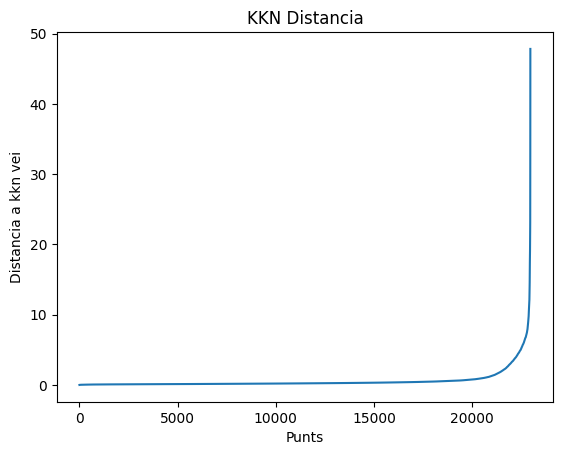

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
#Optim eps
k = 4
nearest_neighbors = NearestNeighbors(n_neighbors=k).fit(Xd)
distances, _ = nearest_neighbors.kneighbors(Xd)

# ordena distancies
sorted_distances = np.sort(distances[:, k-1])

plt.plot(sorted_distances)
plt.xlabel('Punts')
plt.ylabel('Distancia a kkn vei')
plt.title('KKN Distancia')
plt.show()

In [ ]:
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import pdist, squareform
#Optim kcloser
distances=squareform(pdist(Xd))

kcloser = 3
lkthc = [np.sort(x)[kcloser+1] for x in distances]

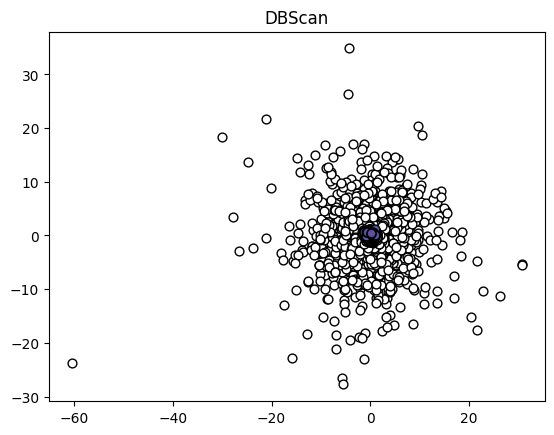

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np


# Converteix Xd a un array de NumPy
Xd_np = Xd.to_numpy()

#kcloser = 3

db = DBSCAN(eps=0.23, min_samples=kcloser, metric='euclidean')
y_db = db.fit_predict(Xd_np)

# Obtenir les etiquetes úniques i generar colors per a cada clúster
unique_labels = np.unique(y_db)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color blanc utilitzat per a soroll.
        col = 'white'
    else:
        col = col

    class_member_mask = (y_db == k)

    # Plotejar els punts per a cada clúster
    plt.scatter(Xd_np[class_member_mask, 0], Xd_np[class_member_mask, 1], c=[col], marker='o', s=40, edgecolor='black', label='cluster '+str(k))

plt.title('DBScan')
plt.show()
